higher pr_shift faster learning and higher convergence loss?

In [143]:
import numpy as np
from glob import glob as glob

from tseMLsims import *
import tensorflow as tf

from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## train single net

In [ ]:
net1 = NetGraph(30)
net2 = NetGraph(30)
print(10)

initializing sub01
initializing sub01
10


In [ ]:
trainer1 = Trainer(net1)
trainer2 = Trainer(net2)
print(0)
train_loss1 = trainer1.train(num_epochs=10000,pr_shift=0)
train_loss2 = trainer2.train(num_epochs=30000,pr_shift=0.3)

0
0 0 1.129762
100 10 1.1007204
200 20 1.117966
300 30 1.111615
400 40 1.0382614
500 50 1.169507
600 60 1.0930768
700 70 1.0144207
800 80 0.6945469
900 90 0.9351013
1000 100 0.99968857
1100 110 0.7558092
1200 120 0.72314703
1300 130 0.5997627
1400 140 0.35167393
1500 150 0.3753993
1600 160 0.44170883
1700 170 0.18431991
1800 180 0.22579418
1900 190 0.48322192
2000 200 0.14045537
2100 210 0.08024624
2200 220 0.91789347
2300 230 0.21138573
2400 240 0.09797657
2500 250 0.06472387
2600 260 0.111052945
2700 270 0.040620647
2800 280 0.06161122
2900 290 0.101096466
3000 300 0.10060627
3100 310 0.019074349
3200 320 0.050228372
3300 330 0.029377883
3400 340 0.028109236
3500 350 0.0855448
3600 360 0.019525986
3700 370 0.01231405
3800 380 0.022499511
3900 390 0.038823538
4000 400 0.016215919
4100 410 0.0096561005
4200 420 0.052612215
4300 430 0.020481639
4400 440 0.026459778
4500 450 0.055502363
4600 460 0.03745107
4700 470 0.019635176
4800 480 0.017859388
4900 490 0.0147019625
5000 500 0.0123614

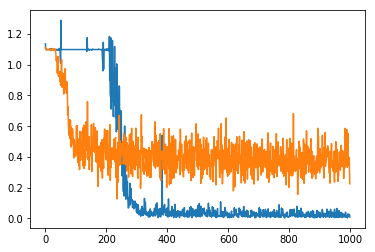

In [141]:
ax=plt.gca()
ax.plot(train_loss1)
ax.plot(train_loss2)

(1, 100, 1)


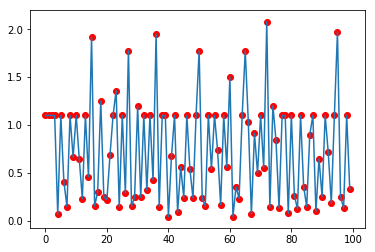

In [138]:
task = TseTask(NUM_PAS)
Xdata,Ydata = task.gen_MLdataset(num_episodes=34,pr_shift=0,depth=100)
eval_data = trainer.eval([Xdata[0]],[Ydata[0]])
plt.scatter(np.arange(100),eval_data['loss'].T,c='r')
plt.plot(np.arange(100),eval_data['loss'].T)

In [ ]:
X

In [ ]:
eval_data['loss'].shape

In [ ]:
trainer.train(num_epochs=5000,pr_shift=0)

In [ ]:
plt.plot(train_loss)

In [115]:
int_curr = [[10000,1],[1,2000]]
block_curr = [[6,2000]]

In [9]:
eval_paths = [[10,0,1,3,5],
              [10,0,2,4,6],
              [11,0,1,4,5],
              [11,0,2,3,6]]

In [117]:
curr = [[200,10]]

# net.reinitialize()
pred_data = trainer.main_loop(curr,eval_paths)
yhat_data = pred_data['yhat']

curriculum (200, 10)


### (epochs,path,depth,len,num_classes)[softmax]

### plots

In [7]:
idx2path_dict = {0:(['10','0','1','3','5']),
                 1:(['10','0','2','4','6']),
                 2:(['11','0','1','4','5']),
                 3:(['11','0','2','3','6'])}
idx2color_dict = {0:'blue',1:'blue',2:'green',3:'green'}

def plt_predictions(depth,tonode1,tonode2,curr):
  f=5
  fig,axarr = plt.subplots(2,2,figsize=(13*f,6*f),sharey=True,sharex=True); axarr=axarr.reshape(-1)
  plt.subplots_adjust(left=0.05,right=0.95,wspace=0.05,hspace=0.1)
  # plotting
  for path_num,ax in enumerate(axarr):
    pathstr = idx2path_dict[path_num]
    pathstr = "-".join(pathstr[:depth+1])
    ax.plot(yhat_data[:,path_num,depth,0,tonode1],label=tonode1,c='blue',lw=3)
    ax.plot(yhat_data[:,path_num,depth,0,tonode2],label=tonode2,c='green',lw=3)
    ax.set_title("eval input: %s"%(pathstr),size=30,color=idx2color_dict[path_num])
    plt_block_divides(ax,curr)
    ax.legend(fontsize=20,loc=2)
    ax.tick_params(labelsize=40)
  # extras
  ax.set_ylim(0,1)
  ax.set_xlim(0)
  
  plt_block_divides(axarr[0],curr)
  # saving and title
  title ='LSTM50_flushing-curr_%s-depth_%i'%(curr_int2str(curr),depth)
  plt.suptitle(title,size=30)
  plt.savefig('figures/'+title)
  

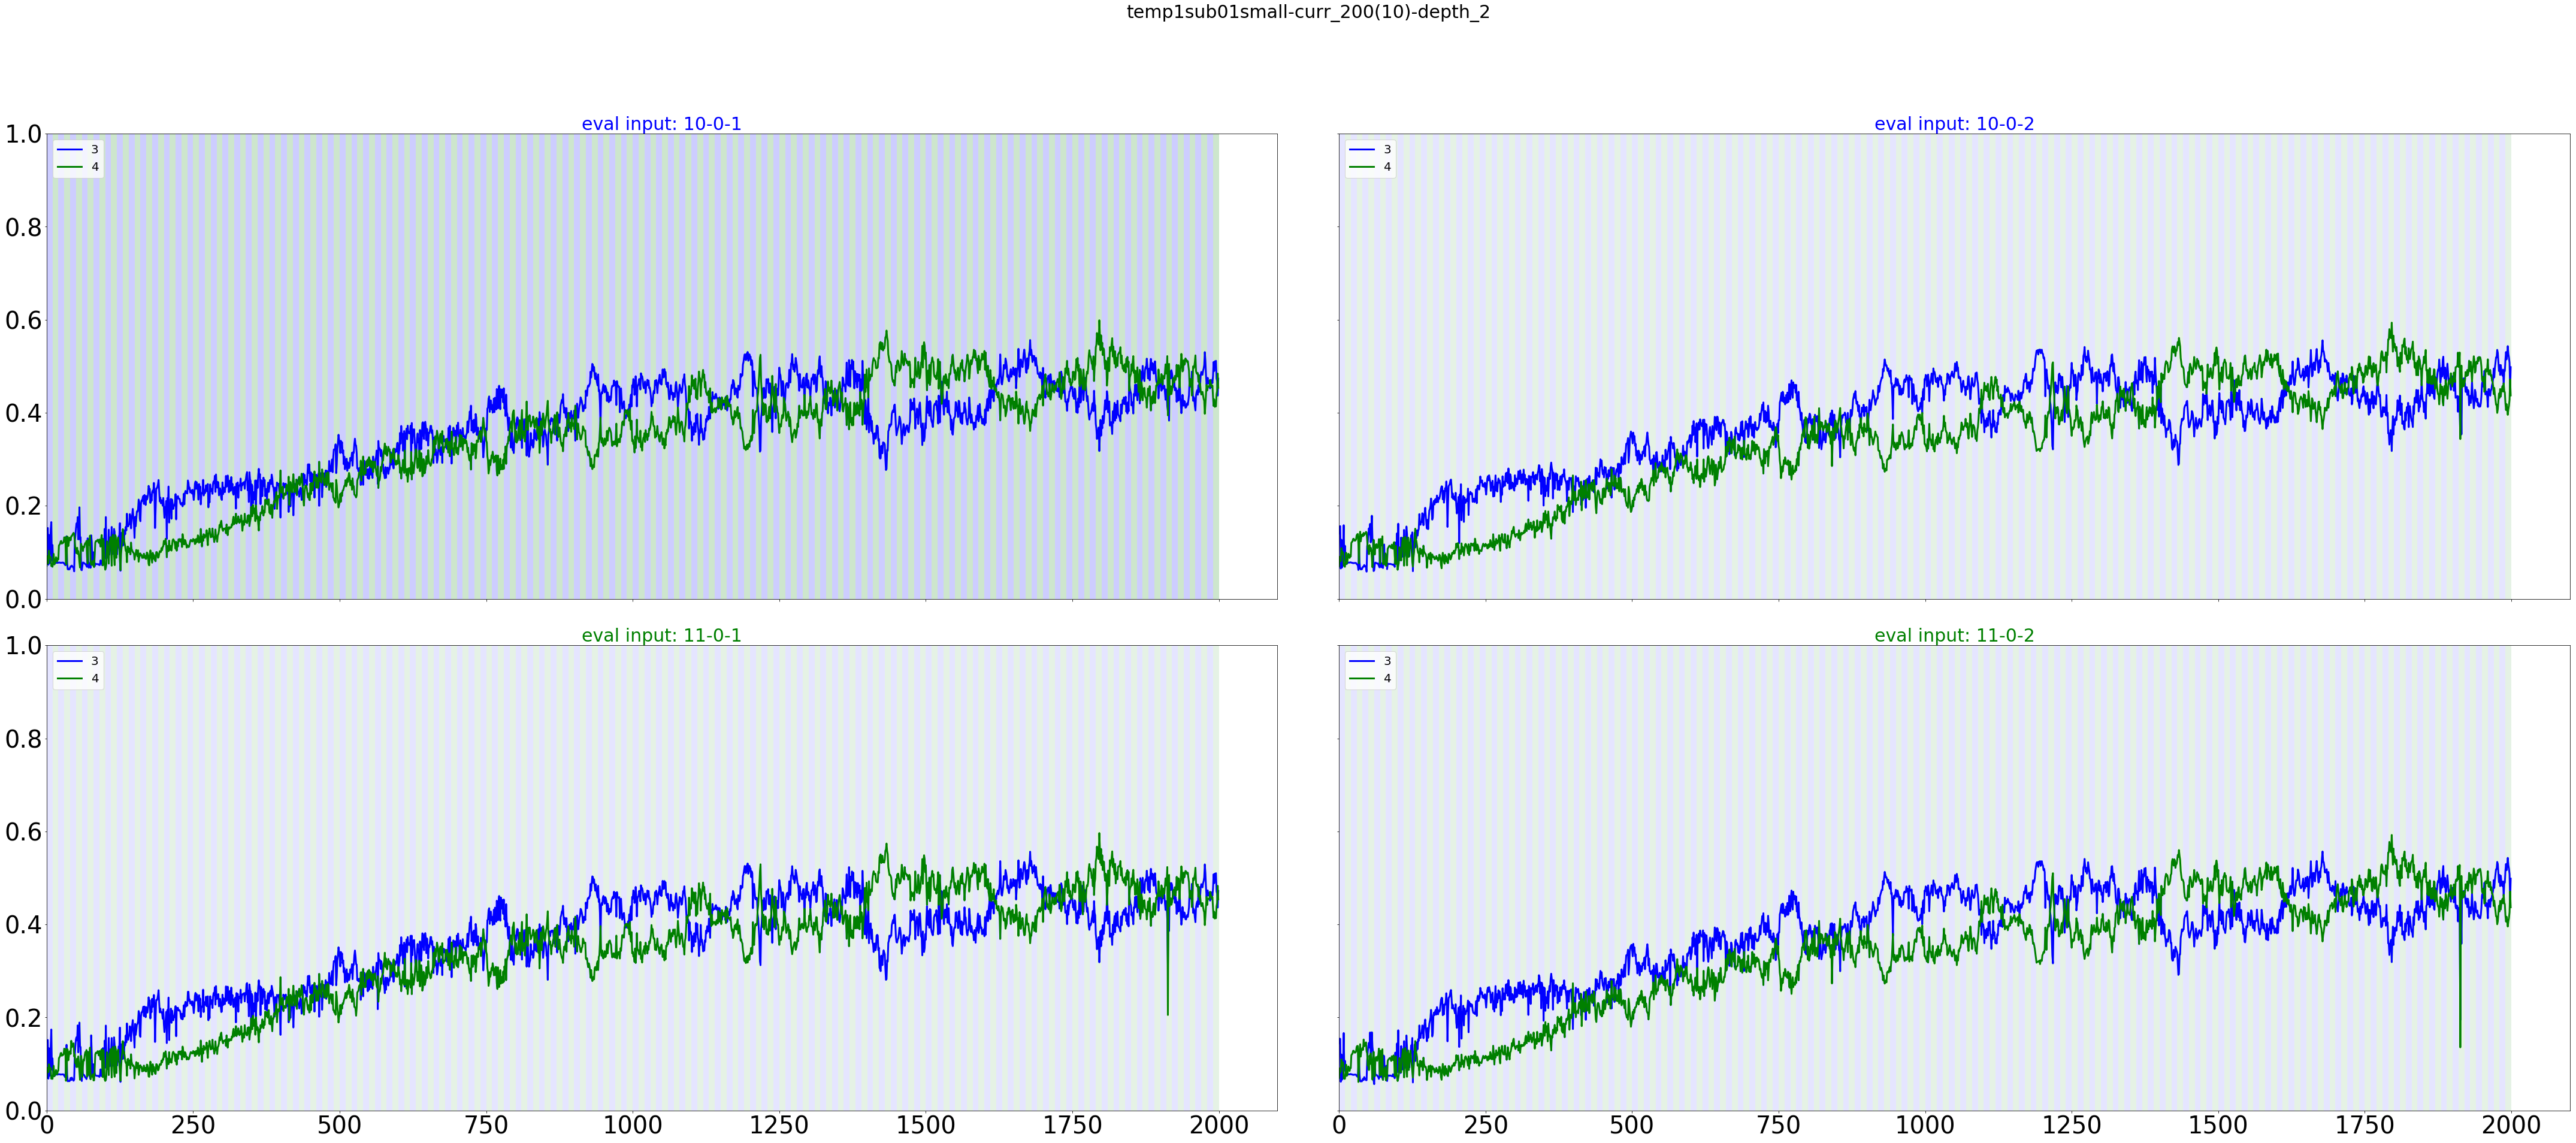

In [119]:
plt_predictions(depth=2,tonode1=3,tonode2=4,curr=curr)

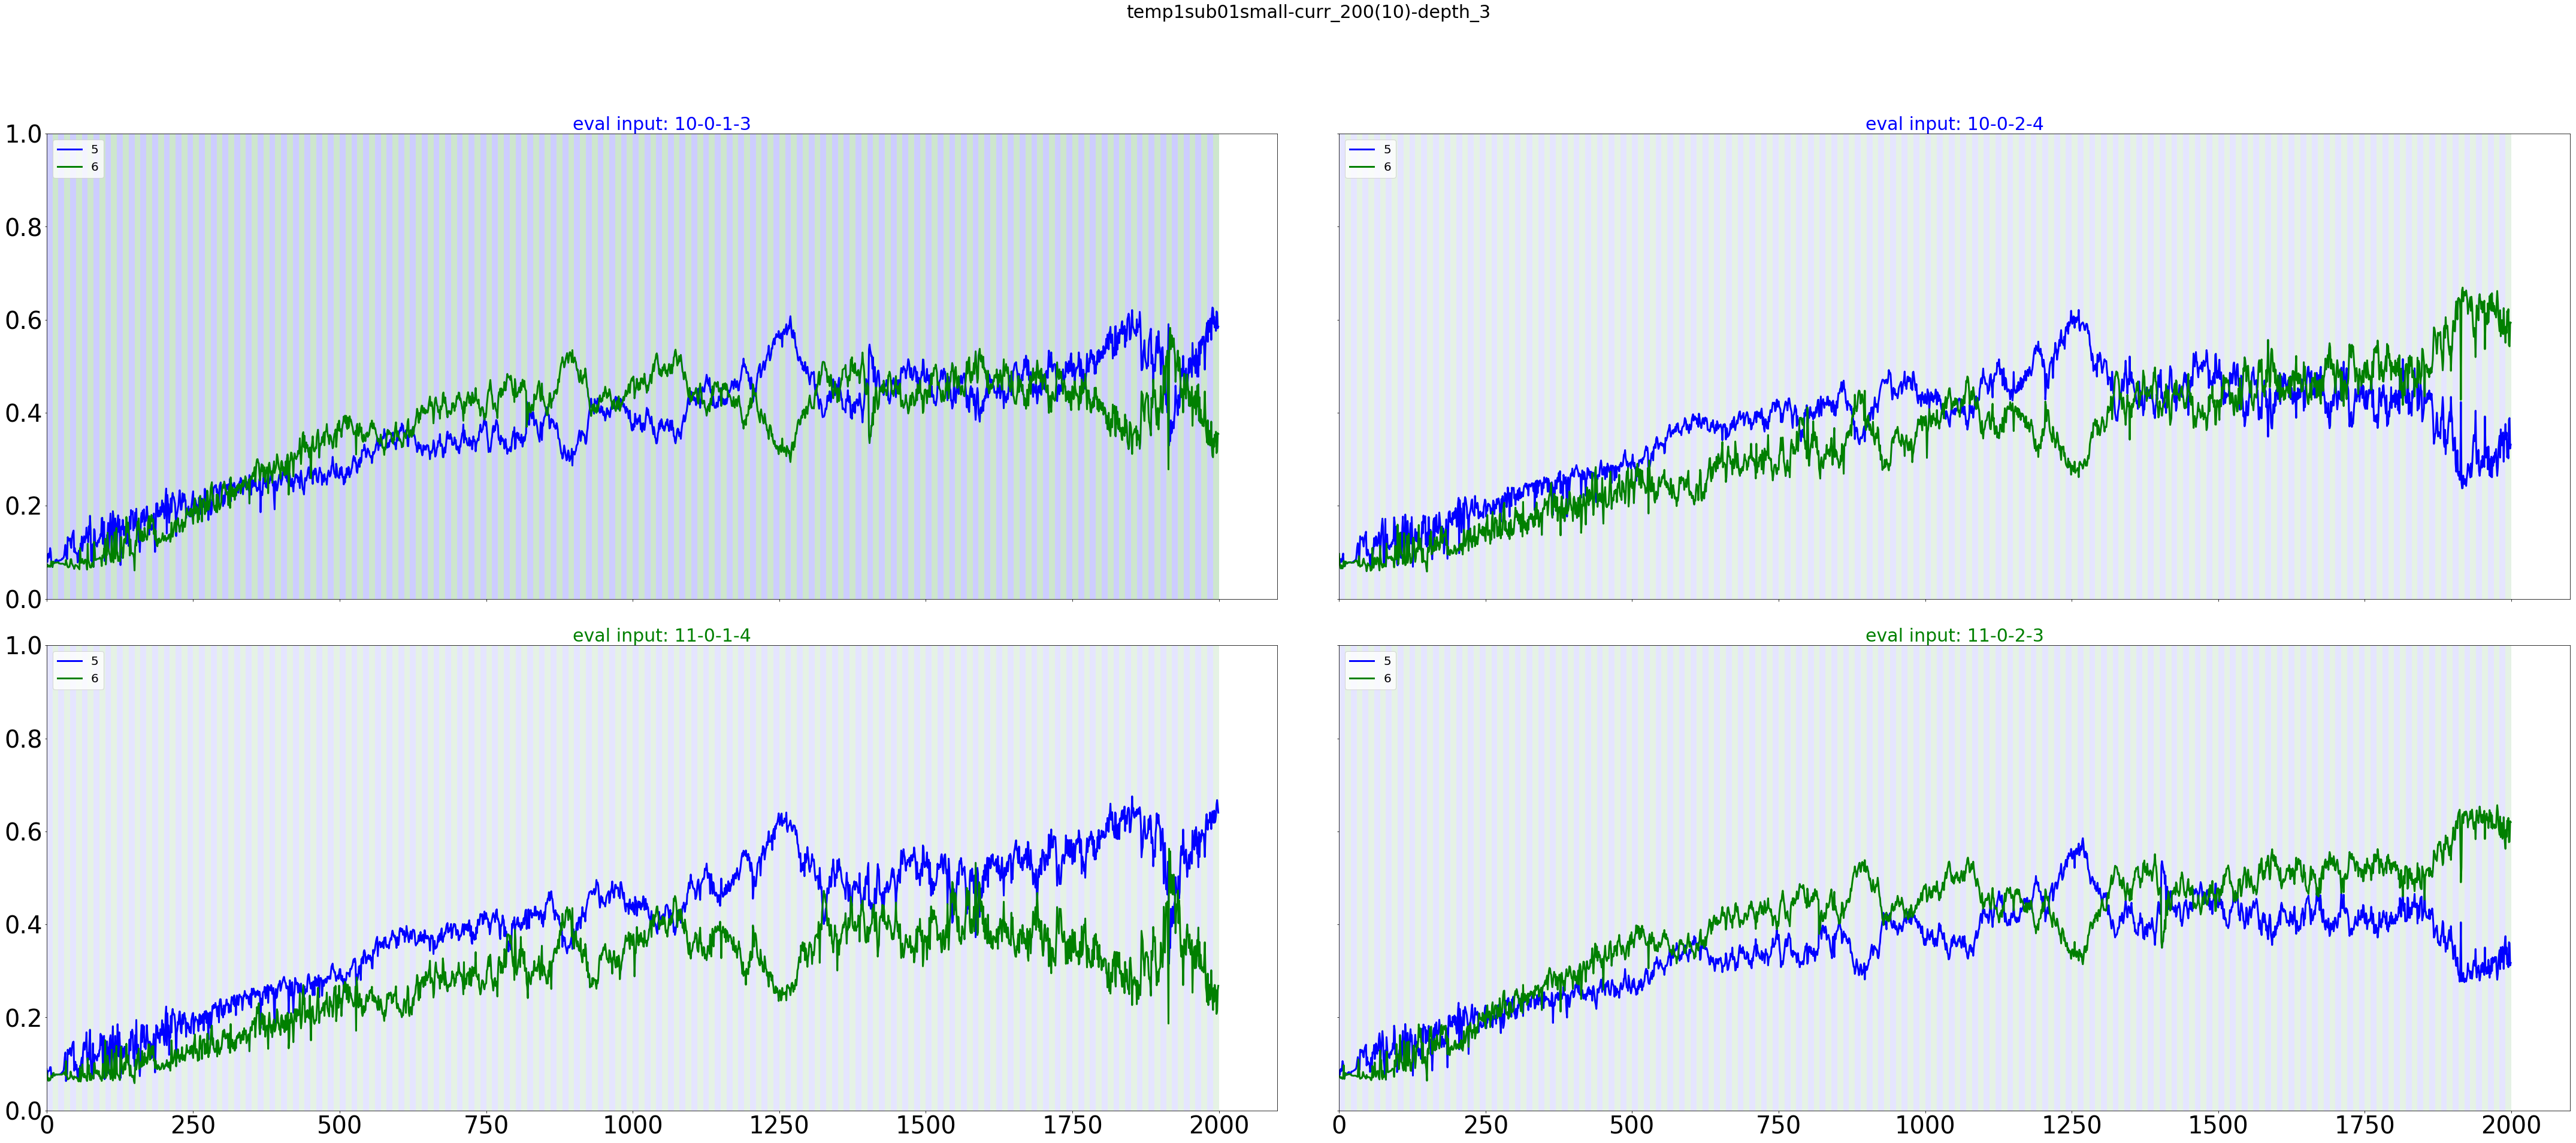

In [120]:
plt_predictions(depth=3,tonode1=5,tonode2=6,curr=curr)

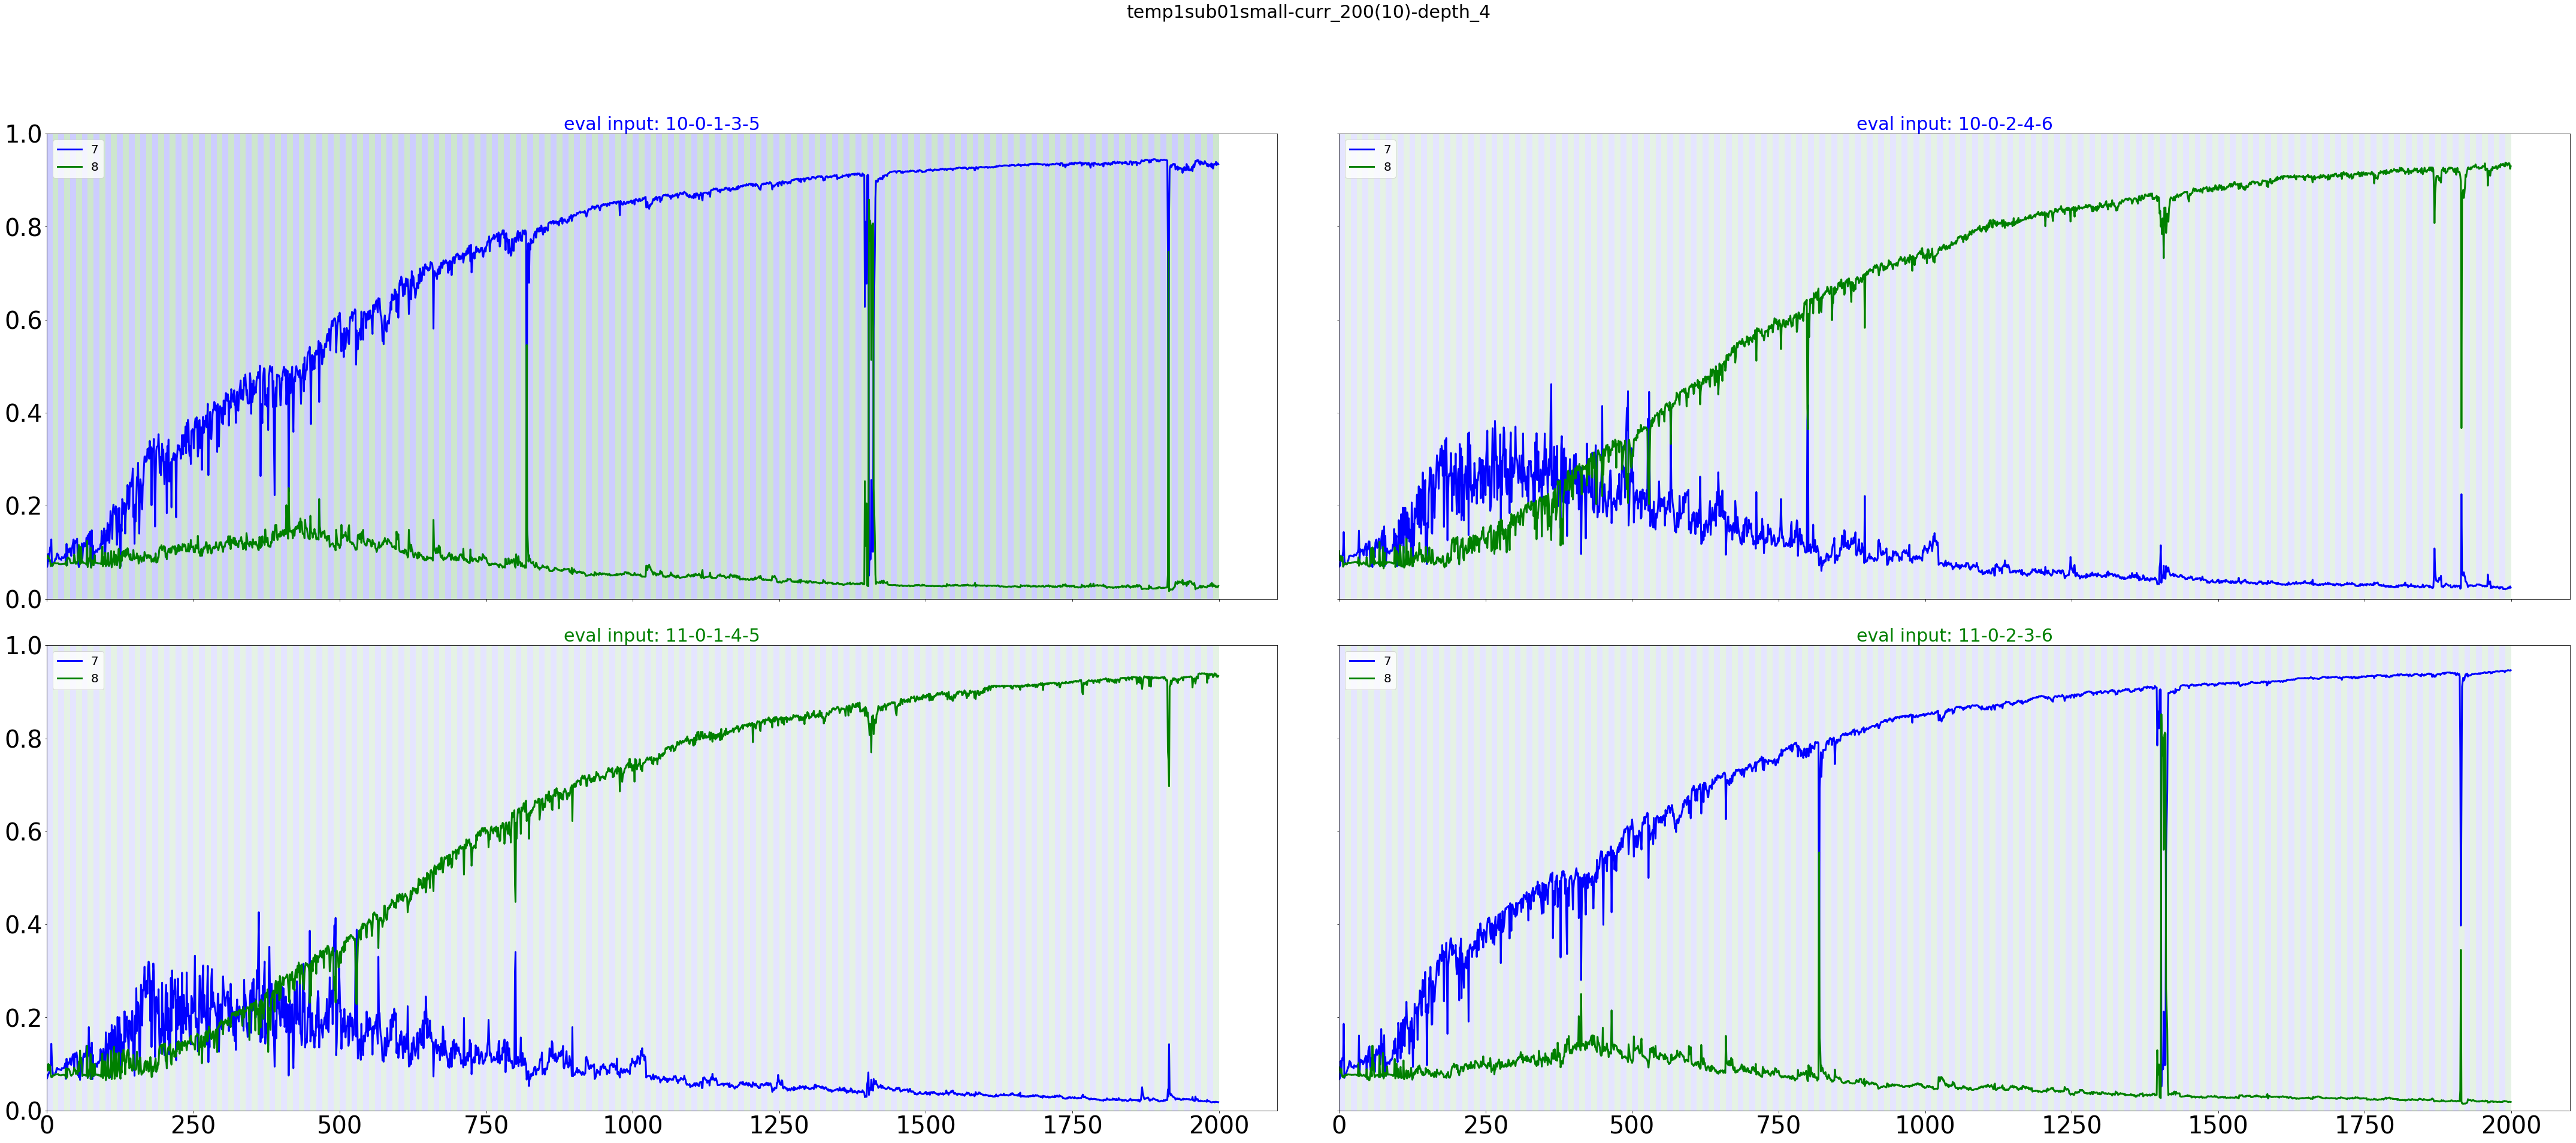

In [121]:
plt_predictions(depth=4,tonode1=7,tonode2=8,curr=curr)

In [13]:
total_ep = 20000

for nb in [50]:
  epb = int(total_ep/nb)
  curr = [[nb,epb]]
  print(curr)
  net.reinitialize()
  pred_data = trainer.main_loop(curr,eval_paths)
  yhat_data = pred_data['yhat']

  plt_predictions(depth=2,tonode1=3,tonode2=4,curr=curr)
  plt_predictions(depth=3,tonode1=5,tonode2=6,curr=curr)
  plt_predictions(depth=4,tonode1=7,tonode2=8,curr=curr)
  plt.close('all')

[[50, 400]]
**reinitializing weights** - NB: random_seed
curriculum (50, 400)


## loop train and save data

In [2]:
blocked_curr = [[6,1000]]
intrlv_curr = [[5000,1],[1,1000]]

# setup
for rnn_size in [5,15,50,100]:
  print('s',rnn_size)
  net = NetGraph(rnn_size)
  trainer = Trainer(net)
  for curriculum in [blocked_curr,intrlv_curr]:
    print('c',curriculum)
    # training
    net.reinitialize()
    pred_data = trainer.main_loop(curriculum)
    # saving
    fname = 'LSTM(%i)_detcsw-curr_%s'%(rnn_size,curr_int2str(curriculum))
#     np.save('eval_data/'+fname,pred_data)

s 5
c [[6, 1000]]
**reinitializing weights**
curriculum (6, 1000)
c [[5000, 1], [1, 1000]]
**reinitializing weights**
curriculum (5000, 1)
curriculum (1, 1000)
s 15
c [[6, 1000]]
**reinitializing weights**
curriculum (6, 1000)
c [[5000, 1], [1, 1000]]
**reinitializing weights**
curriculum (5000, 1)
curriculum (1, 1000)
s 50
c [[6, 1000]]
**reinitializing weights**
curriculum (6, 1000)
c [[5000, 1], [1, 1000]]
**reinitializing weights**
curriculum (5000, 1)
curriculum (1, 1000)
s 100
c [[6, 1000]]
**reinitializing weights**
curriculum (6, 1000)
c [[5000, 1], [1, 1000]]
**reinitializing weights**
curriculum (5000, 1)
curriculum (1, 1000)


# restore and plot

In [5]:
# plotting helpers
def curr_int2str(curr):
  """
  takes an int curriculum: 
    e.g. [[5000,1],[1,1000]]
    [nblocks,epb]
  returns a str curriculum:
    e.g. "5000(1)1(1000)"
    nblocks(epb)
  """
  curstr = ""
  for nb,epb in curr: curstr += "%i(%i)"%(nb,epb) 
  return curstr

def curr_str2int(curr_str):
  """ 
  takes a string formated curriculum: 
    e.g. "5000(1)1(1000)"
  and returns a curriculum: 
    e.g. [[5000,1],[1,1000]]
  """
  curr = []
  for cu in curr_str.split(')')[:-1]:
    curr.append([int(c) for c in cu.split('(')])
  return curr
  
  
def get_block_idx(num_blocks,block_len,offset=0):
  """ 
  helper for plotting curriculum structure 
  returns the begin and end indices of blocks
  """
  start_idx_L,end_idx_L = [],[]
  for block in range(num_blocks):
    start_idx = block*block_len + offset
    end_idx = start_idx + block_len 
    start_idx_L.append(start_idx)
    end_idx_L.append(end_idx)
  return start_idx_L,end_idx_L

def plt_block_divides(ax,curr):
  """
  plotting curriculum structure (background color)
  """
  offset = 0
  startL,endL = [],[]
  for nb,epb in curr:
    start_L,end_L = get_block_idx(nb,epb,offset)
    offset = end_L[-1]
    startL.extend(start_L)
    endL.extend(end_L)
  y0,y1 = ax.get_ylim()
  colors = ['blue','green']
  for block in range(len(startL)):
    ax.fill_between([startL[block],endL[block]],-.05,1.05,
                      facecolor=colors[block%2],alpha=0.1)
    if len(startL)<100:
      ax.axvline(startL[block],c='r',alpha=0.1)


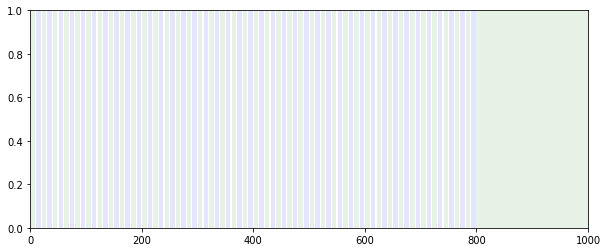

In [43]:
plt.figure(figsize=(10,4))
ax = plt.gca()
cL = ['green','blue']
dt = 10
for i,t in enumerate(np.arange(0,800,dt)):
  c = cL[i%2]
  ax.fill_between(np.arange(t+1,t+dt),-.05,1.05,
                facecolor=c,alpha=0.1)
  

ax.fill_between(np.arange(800,1000),-.05,1.05,
              facecolor='green',alpha=0.1)

plt.ylim(0,1)
plt.xlim(0,1000)
plt.savefig('figures/currex4')

### restore and plot data

In [58]:
fpath = "eval_data/LSTM_50-curr_6(1000).npy"
yhat = np.load(fpath)['yhat'].squeeze()
# yhat = 
yhat.shape

(6000, 18, 2, 12)

dtype('float32')

In [222]:
M_L = []
S_L = []
for t1,t2 in zip([0,2000,4000],[1000,3000,5000]):
  L2 = []
  for idx in range(2,7):
    edge = idx
    tonode = edge+2
    yhat_at_t = yhat[t1:t2,edge,0,tonode]
    L2.append(yhat_at_t)
  M_L.append(np.mean(L2,0))
  S_L.append(np.std(L2,0)/np.sqrt(3))


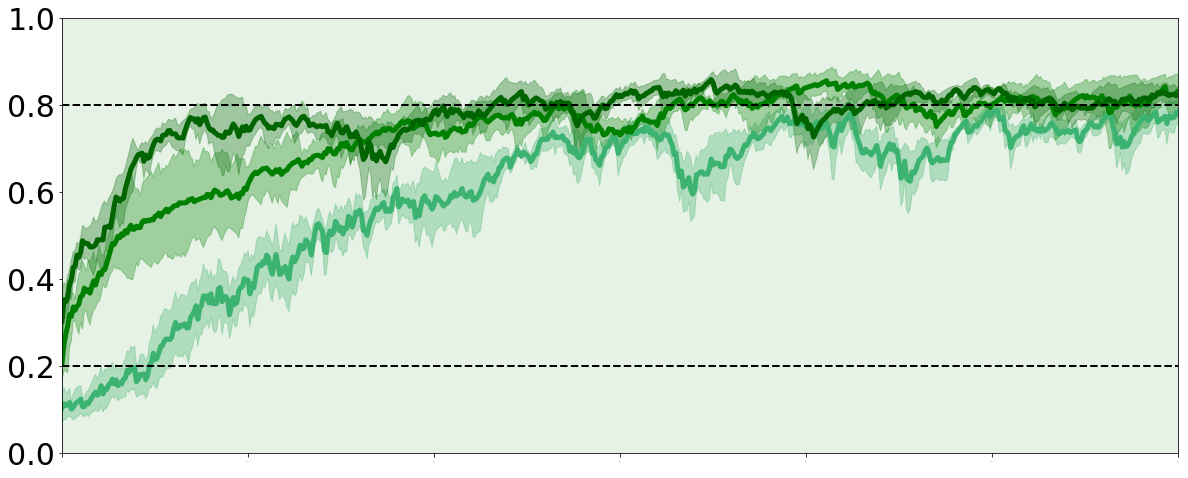

In [250]:

plt.figure(figsize=(20,8))
cL = ['mediumseagreen','green','darkgreen']
for i in range(0,3,1):
  plt.plot(M_L[i],lw=5,c=cL[i])
  plt.fill_between(np.arange(1000),M_L[i]-S_L[i],M_L[i]+S_L[i],
                   alpha=.3,color=cL[i])
plt.ylim(0,1)
plt.fill_between(np.arange(1000),-0.5,1.05,
                   alpha=.1,color='green')
plt.axhline(0.8,ls='--',lw=2,c='black')
plt.axhline(0.2,ls='--',lw=2,c='black')
plt.yticks(fontsize=30)
plt.xticks(fontsize=0)
plt.xlim(0,600)
plt.savefig('figures/blocked_transfer')